In [1]:
import pandas as pd
import time
from datetime import datetime, date, timedelta
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

In [53]:
filePath = './Plants_of_me.csv'  # repalce with your own file path

In [55]:
def getMetaData(filePath):
    """transfer csv mate data to dataframe"""
    df = pd.read_csv(filePath)
    return df

df = getMetaData(filePath)
df.head(5)

,Start Time,End Time,Tag,Note,Tree Type,Is Success
0,2019-01-13T10:43:26.000+0800,2019-01-13T11:57:41.000+0800,未设定,NaN,雪松,True
1,2019-01-13T13:00:31.000+0800,2019-01-13T14:11:13.000+0800,未设定,NaN,雪松,True
2,2019-01-13T14:21:06.000+0800,2019-01-13T15:31:12.000+0800,未设定,NaN,雪松,True
3,2019-01-13T15:45:21.000+0800,2019-01-13T16:48:00.000+0800,未设定,NaN,雪松,False
4,2019-01-13T18:00:23.000+0800,2019-01-13T19:00:58.000+0800,未设定,NaN,雪松,False


In [56]:
class Time:
    localTime = time.strftime("%Y-%m-%d %H:%M:%S", time.localtime())  # YYYY-MM-DD hh:mm:ss
    localDate = localTime.split()[0]  # YYYY-MM-DD
    periodDict = {'week': 7, 'month': 30, 'quarter': 90, 'half a year': 180, 'year': 365}
    
    
    def getDateList(self, startDate: str, endDate: str) -> list:
        """get the date list between start date and end date"""
        dateList = [datetime.strftime(x, '%Y-%m-%d') for x in list(pd.date_range(startDate, endDate))]
        return dateList
    
    
    def getPastDate(self, N: int):
        """Get the date before N days (base on today)"""
        pastDate = date.today() - timedelta(days = N)
        pastDate.strftime('%Y-%m-%d')  # 格式化日期
        return pastDate
        

Input the date in format YYYY-MM-DD (Input Today with ENTER ): 
You do not have a tree in 2020-12-01

Input a time of period (Input week with ENTER)
ONLY week / month / quarter / half a year / year ARE SUPPORTED: 
In the last 8 days, your average success rate is: 31.19%


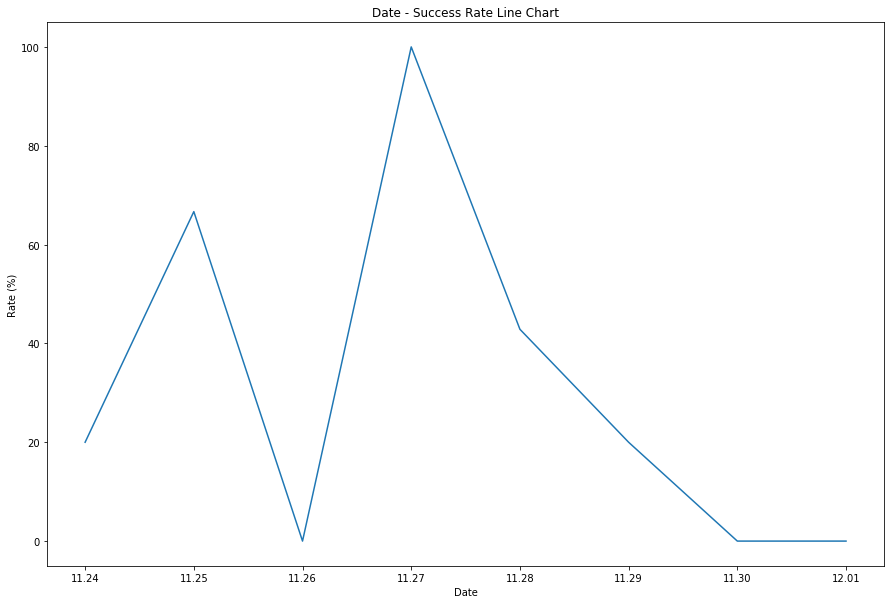

In [65]:
class SuccessAnalysis:
    def __init__(self, df):
        self.df = df
    
    
    def successInDay(self, 
                     date = input('Input the date in format YYYY-MM-DD (Input Today with ENTER ): '
                                 ) or Time.localDate,
                    showResult=False):
        """
        success number / rate in a sepcific day
        :params date: (INPUT) a date with format YYYY-MM-DD, TODAY as default input
        :params showResult: (bool) whether print result
        :return successRate: (float) success rate in the day
        """
#         date = input('Input the date in format YYYY-MM-DD (Input Today with ENTER ): ') or Time.localDate
        boolInDate = self.df['Start Time'].str.contains(date)  # transfer to bool
        dfInDate = self.df[boolInDate]  # get all row meet the date condition
        
        try:
            countTree = len(dfInDate)  # eligible tree number in total
            dfSuccessTree = dfInDate.loc[dfInDate['Is Success'] == True]  # successed tree df
            successRate = round((len(dfSuccessTree) / countTree) * 100, 2)  # success rate
        
        except ZeroDivisionError:
            successRate = None
            if showResult:
                print('You do not have a tree in {}'.format(date), end = '\n\n')
        
        else:
            if showResult:
                print('In {}, there are {} trees, {} of which are successful, the success rate is {}%'
                      .format(date, countTree, len(dfSuccessTree), successRate), end = '\n\n')
            pass
        return successRate if successRate else 0.0  # assign 0 for the day does not have a tree
    
    
    def successInTimePeriod(self):
        """success number / rate in a time of period"""
        timePeriod = input(
            'Input a time of period (Input week with ENTER)\n'
            'ONLY week / month / quarter / half a year / year ARE SUPPORTED: ').strip() or 'week'  # week as default
        if timePeriod not in ['week', 'month', 'quarter', 'half a year', 'year']: 
            raise NameError ('The Input Name Is Error, Please Input Again.')
        
        periodInDays = Time.periodDict[timePeriod]
        t = Time()
        pastDate = t.getPastDate(periodInDays)
        dateList = t.getDateList(pastDate, Time.localDate)
        # get cusscessful rate list correspond to dateList
        successRateList = [self.successInDay(d) for d in dateList]
        return dateList, successRateList    
    
    
    def plotSuccess(self, days: list, sucRates: list):
        """
        Plot days - success rate Line Chart
        :params days: a list of days with format YYYY-MM-DD
        :params sucRates: a list of success rate correspond to days
        """
        days = ['.'.join(day.split('-')[1:]) for day in days]  # reformat days list
        # print average success rate
        print('In the last {} days, your average success rate is: {}%'
              .format(len(days), np.round(np.mean(sucRates), 2)))
        
        X, Y = days, sucRates
#         width, height = len(days), int(len(days) * 2 / 3)
#         figsize = None if width is None else (width, height)
        plt.figure(figsize=(15,10))  # TODO: auto size
        plt.plot(X, Y)
        plt.title('Date - Success Rate Line Chart')
        plt.xlabel('Date')
        plt.ylabel('Rate (%)')
        plt.autoscale(enable=True, axis='both', tight=False)
        
    
    def aveSucRate(self, days: list, sucRates: list):
        """
        Get average success rate according to month
        """
        # TODO: in the last {}, your average success rate is 
        # TODO: month average success rate calculate and plot
        

    
        
s = SuccessAnalysis(df)
s.successInDay(showResult=True)  # input a specific date and analyse (if you wish)
days, succ = s.successInTimePeriod()
s.plotSuccess(days, succ)

In [41]:
print(days)
print(succ)

['2020-11-24', '2020-11-25', '2020-11-26', '2020-11-27', '2020-11-28', '2020-11-29', '2020-11-30', '2020-12-01']
[20.0, 66.67, 0.0, 100.0, 42.86, 20.0, 0.0, 0.0]
